In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\silpa\Downloads\googleplaystore new.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.drop("App", axis=1, inplace=True)

In [5]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.shape

(10841, 12)

In [7]:
data.dtypes

Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
data.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  int64  
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10841 non-null  object 
 8   Genres          10840 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1016.5+ KB


In [10]:
data.isnull().sum()

Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [11]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [12]:
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace('+',''))
data['Installs'] = data['Installs'].apply(lambda x: str(x).replace(',',''))
data['Installs'] = data['Installs'].apply(lambda x: float(x))                                          
                                          

In [13]:
#converting size to mb
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    elif size.endswith('M'):
        value = float(size[:-1])
        return value * 1
    elif size.endswith('k'):
        value = float(size[:-1])
        return value / 1024
    else:
        return float(size)

# Apply the conversion function to the 'Size' column
data['Size'] = data['Size'].apply(convert_size)

# Print the updated 'Size' column
print(data['Size'])

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64


In [14]:
data["Content Rating"].replace("Adults only 18+", "Mature 17+", inplace =True)

In [15]:
data["Content Rating"].value_counts()

Everyone        8715
Teen            1208
Mature 17+       502
Everyone 10+     414
Unrated            2
Name: Content Rating, dtype: int64

In [16]:
null_rating_mask = data['Rating'].isnull()

# Step 2: Create a separate dataset containing rows with null values for 'Rating'
null_rating_data = data[null_rating_mask]

# Step 3: Create a separate dataset containing rows without null values for 'Rating'
nonnull_data = data[~null_rating_mask]


In [17]:
# Calculate the median size for each category
category_median_size = nonnull_data.groupby('Category')['Size'].transform('median')

# Replace missing 'Size' values with the median size of their respective categories
nonnull_data['Size'].fillna(category_median_size, inplace=True)


C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\994478326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Size'].fillna(category_median_size, inplace=True)


In [18]:
nonnull_data.isna().sum()

Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [19]:
nonnull_data["Genres"] = data["Genres"].str.split(";").str[0]
nonnull_data["Genres"].replace("Music & Audio", "Music ", inplace =True)

C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\650674121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data["Genres"] = data["Genres"].str.split(";").str[0]
C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\650674121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data["Genres"].replace("Music & Audio", "Music ", inplace =True)


In [20]:
nonnull_data['Genres'].astype(str)

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10834            Education
10836            Education
10837            Education
10839    Books & Reference
10840            Lifestyle
Name: Genres, Length: 9367, dtype: object

In [21]:
nonnull_data["Last Updated"] = pd.to_datetime(nonnull_data["Last Updated"])

C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\3256141679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data["Last Updated"] = pd.to_datetime(nonnull_data["Last Updated"])


In [22]:
nonnull_data['Last Updated'] = pd.to_datetime(nonnull_data['Last Updated'], format='%d-%m-%Y')

# Extract the year from the 'date' column and store it in a new column 'year'
nonnull_data['Last Updated'] = nonnull_data['Last Updated'].dt.year

C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\2249257245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Last Updated'] = pd.to_datetime(nonnull_data['Last Updated'], format='%d-%m-%Y')
C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\2249257245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Last Updated'] = nonnull_data['Last Updated'].dt.year


In [23]:
nonnull_data.dtypes

Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated        int64
Current Ver        object
Android Ver        object
dtype: object

Text(0.5, 1.0, 'Scatter Plot: Reviews vs. Rating')

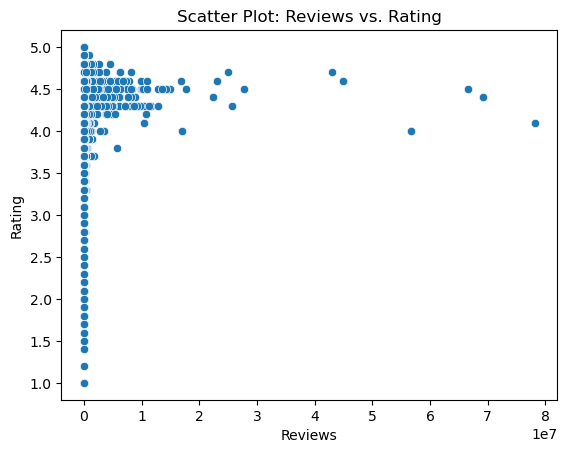

In [24]:
x_data=data['Reviews']
y_data=data['Rating']
sns.scatterplot(x=x_data,y=y_data)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Scatter Plot: Reviews vs. Rating')


Text(0.5, 1.0, 'Scatter Plot: Installs vs. Rating')

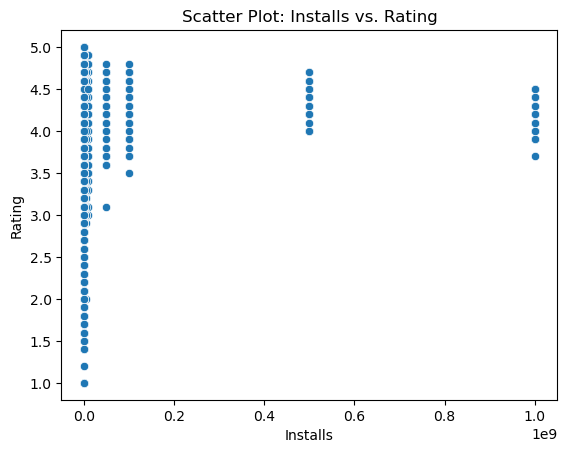

In [25]:
x_data=data['Installs']
y_data=data['Rating']
sns.scatterplot(x=x_data,y=y_data)
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Scatter Plot: Installs vs. Rating')

C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\2065409323.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[numeric_features].corr()


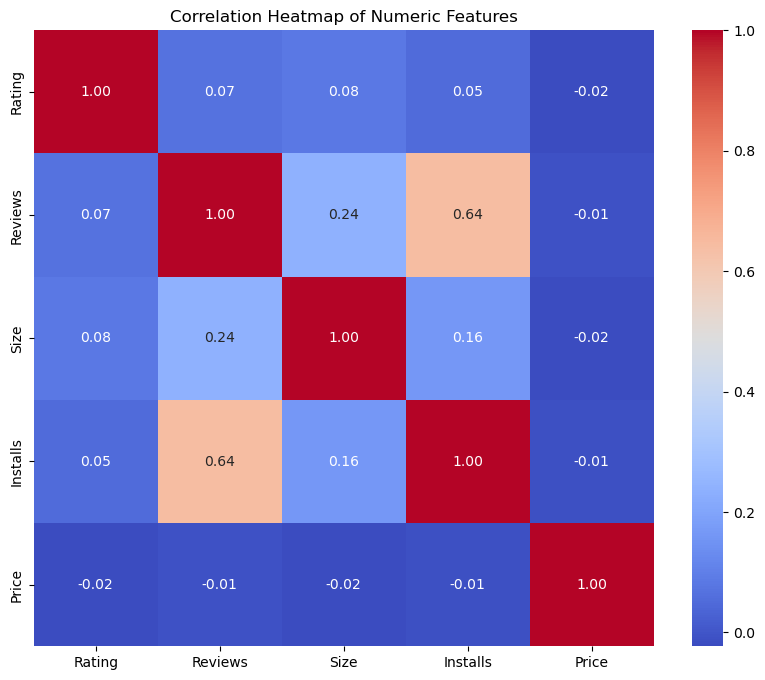

In [26]:
numeric_features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price','Last Updated']

# Create a correlation matrix for the selected numeric features
correlation_matrix = data[numeric_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

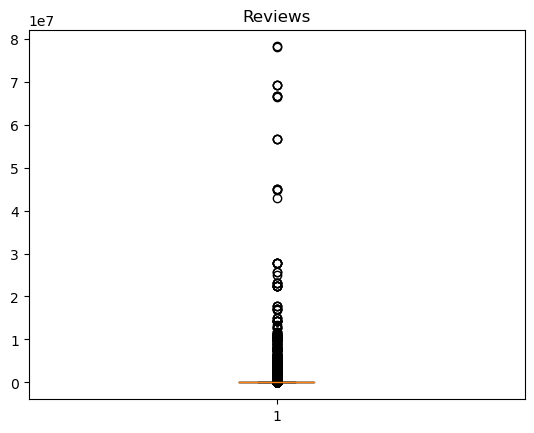

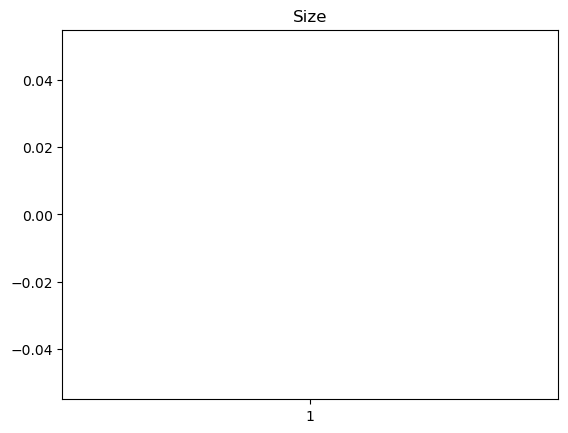

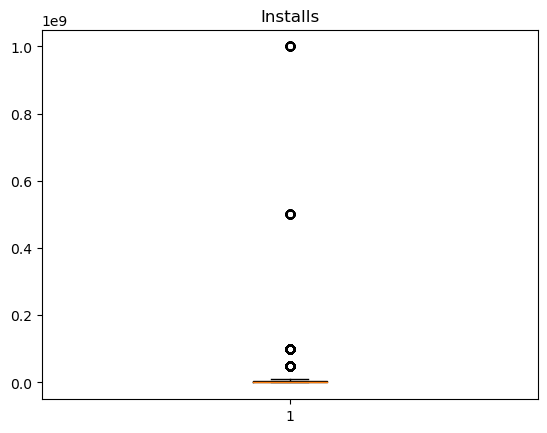

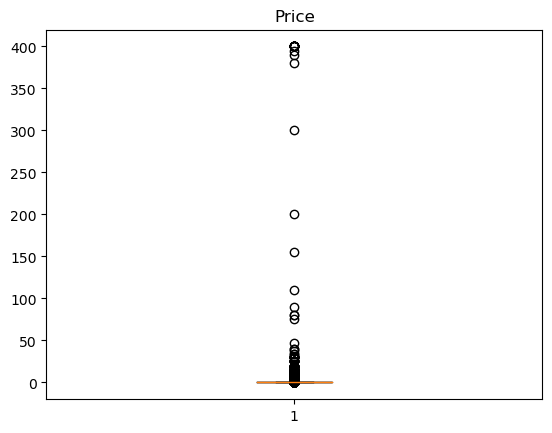

In [27]:
# Outlier Detection
num_col = ['Reviews','Size','Installs','Price'] 
for i in num_col:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [28]:
nonnull_data['Category'].value_counts()

FAMILY                 1747
GAME                   1097
TOOLS                   734
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
PERSONALIZATION         314
LIFESTYLE               314
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [29]:
# Step 1: Compute the value counts of each category in the 'Category' column
category_counts = nonnull_data['Category'].value_counts()

# Step 2: Select the top 11 most frequently occurring categories
top_frequent_categories = category_counts.nlargest(11).index

# Step 3: Replace all categories not in the top 11 with "Other"
nonnull_data.loc[~nonnull_data['Category'].isin(top_frequent_categories), 'Category'] = "Other"

In [30]:
nonnull_data['Category'].value_counts()

Other              3173
FAMILY             1747
GAME               1097
TOOLS               734
PRODUCTIVITY        351
MEDICAL             350
COMMUNICATION       328
FINANCE             323
SPORTS              319
PHOTOGRAPHY         317
LIFESTYLE           314
PERSONALIZATION     314
Name: Category, dtype: int64

OneHot Encoding 

In [31]:
from sklearn.preprocessing import OneHotEncoder
# Convert Categorical Columns to String Type (Optional, if not done already)
nonnull_data['Category'] = nonnull_data['Category'].astype(str)
nonnull_data['Type'] = nonnull_data['Type'].astype(str)

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit and Transform the 'Category' and 'Type' columns
encoded_columns = ohe.fit_transform(nonnull_data[['Category', 'Type']])

# Get unique category names after one-hot encoding
category_names = ohe.get_feature_names_out(['Category', 'Type'])

# Create a DataFrame with the encoded columns and feature names
encoded_df = pd.DataFrame(encoded_columns, columns=category_names, index=nonnull_data.index)

# Concatenate the encoded DataFrame with the original DataFrame (excluding 'Category' and 'Type' columns)
nonnull_data_encoded = pd.concat([nonnull_data.drop(['Category', 'Type'], axis=1), encoded_df], axis=1)

# Print the encoded data
print(nonnull_data_encoded)

       Rating  Reviews   Size    Installs  Price Content Rating  \
0         4.1      159  19.00     10000.0    0.0       Everyone   
1         3.9      967  14.00    500000.0    0.0       Everyone   
2         4.7    87510   8.70   5000000.0    0.0       Everyone   
3         4.5   215644  25.00  50000000.0    0.0           Teen   
4         4.3      967   2.80    100000.0    0.0       Everyone   
...       ...      ...    ...         ...    ...            ...   
10834     4.0        7   2.60       500.0    0.0       Everyone   
10836     4.5       38  53.00      5000.0    0.0       Everyone   
10837     5.0        4   3.60       100.0    0.0       Everyone   
10839     4.5      114   7.15      1000.0    0.0     Mature 17+   
10840     4.5   398307  19.00  10000000.0    0.0       Everyone   

                  Genres  Last Updated         Current Ver  \
0           Art & Design          2018               1.0.0   
1           Art & Design          2018               2.0.0   
2        

C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\3811269294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Category'] = nonnull_data['Category'].astype(str)
C:\Users\silpa\AppData\Local\Temp\ipykernel_1068\3811269294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonnull_data['Type'] = nonnull_data['Type'].astype(str)
C:\Users\silpa\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be rem

In [32]:
nonnull_data_encoded.head()

,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,...,Category_GAME,Category_LIFESTYLE,Category_MEDICAL,Category_Other,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SPORTS,Category_TOOLS,Type_Paid
0,4.1,159,19.0,10000.0,0.0,Everyone,Art & Design,2018,1.0.0,4.0.3 and up,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.9,967,14.0,500000.0,0.0,Everyone,Art & Design,2018,2.0.0,4.0.3 and up,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.7,87510,8.7,5000000.0,0.0,Everyone,Art & Design,2018,1.2.4,4.0.3 and up,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.5,215644,25.0,50000000.0,0.0,Teen,Art & Design,2018,Varies with device,4.2 and up,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.3,967,2.8,100000.0,0.0,Everyone,Art & Design,2018,1.1,4.4 and up,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
nonnull_data_encoded['Last Updated'] = le.fit_transform(nonnull_data_encoded['Last Updated'])

In [34]:
#Robust scaling
from sklearn.preprocessing import RobustScaler

Scaling

In [35]:
# Initialize the RobustScaler
scaler = RobustScaler()
columns_to_scale = [ 'Size','Reviews','Installs']

# Fit and transform the selected columns
nonnull_data_encoded[columns_to_scale] = scaler.fit_transform(nonnull_data_encoded[columns_to_scale])

In [36]:
columns_to_drop = ['Price', 'Genres', 'Content Rating', 'Current Ver', 'Android Ver']
nonnull_data_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)

In [37]:
#splitting data to feature and target
X = nonnull_data_encoded.drop('Rating',axis=1)
y = nonnull_data_encoded['Rating']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

Linear Regression 

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

In [41]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.24234660195157187
0.028291425535790227


Lasso

In [42]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into features (X) and target variable (y)
X = nonnull_data_encoded[["Reviews", "Size", "Installs", "Type_Paid", "Last Updated", "Category_GAME", "Category_LIFESTYLE", "Category_MEDICAL", "Category_Other", "Category_PERSONALIZATION", "Category_PHOTOGRAPHY", "Category_PRODUCTIVITY", "Category_SPORTS", "Category_TOOLS"]]  # Input 
y = nonnull_data_encoded["Rating"]   # Target variable 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso_reg = Lasso(alpha=0.1)  # Set the regularization parameter (alpha)
lasso_reg.fit(X_train, y_train)

# Make predictions using the Lasso regression model
y_pred = lasso_reg.predict(X_test)

# Calculate the mean squared error (MSE)
lasso_mse = mean_squared_error(y_test, y_pred)


In [43]:
print("Predicted Rating:")
print(y_pred)

print("Mean Squared Error (MSE):", lasso_mse)


Predicted Rating:
[4.18088022 4.18088814 4.18088132 ... 4.18169861 4.18088765 4.18097021]
Mean Squared Error (MSE): 0.24628490547483686


In [44]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
lasso_r2 = r2_score(y_test, y_pred)

# Calculate mean absolute error (MAE)
lasso_mae = mean_absolute_error(y_test, y_pred)

# Print R-squared and MAE
print("R-squared:", lasso_r2)
print("Mean Absolute Error (MAE):", lasso_mae)


R-squared: 0.0010471716630651162
Mean Absolute Error (MAE): 0.35658438627677397


RandomForest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [46]:
# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.22717148896537442
Root Mean Squared Error (RMSE): 0.4766251031632455
Mean Absolute Error (MAE): 0.3156075015669732
R-squared (R2): 0.07857283830713857


In [47]:
import pickle

In [48]:
nonnull_data_encoded.dtypes

Rating                      float64
Reviews                     float64
Size                        float64
Installs                    float64
Last Updated                  int64
Category_FAMILY             float64
Category_FINANCE            float64
Category_GAME               float64
Category_LIFESTYLE          float64
Category_MEDICAL            float64
Category_Other              float64
Category_PERSONALIZATION    float64
Category_PHOTOGRAPHY        float64
Category_PRODUCTIVITY       float64
Category_SPORTS             float64
Category_TOOLS              float64
Type_Paid                   float64
dtype: object

In [49]:
nonnull_data['Category'].value_counts()

Other              3173
FAMILY             1747
GAME               1097
TOOLS               734
PRODUCTIVITY        351
MEDICAL             350
COMMUNICATION       328
FINANCE             323
SPORTS              319
PHOTOGRAPHY         317
LIFESTYLE           314
PERSONALIZATION     314
Name: Category, dtype: int64